# Homework 8a: Nonlinear Equations


### Problem 1
Use fsolve to find the roots of the polynomial $f(x) = 2x^2 + 3x - 10$.

Roots of the Polynomial [1.60849528] & [-3.10849528]


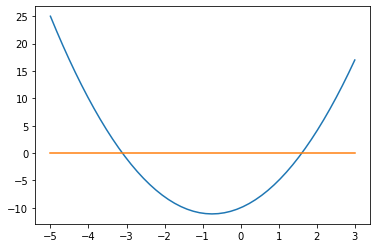

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

def f(x):
    y = ((2 * x**2) + (3*x) - 10)
    return y

x = np.linspace(-5,3)

plt.plot(x,f(x))
plt.plot(x,np.zeros(len(x)))


x1 = fsolve(f,1)

x2 = fsolve(f,-1)


print('Roots of the Polynomial',x1,'&', x2)

### Problem 2

Use fsolve to find the solution of the following two equations:
\begin{align}
f(x,y) &= 2x^{2/3}+y^{2/3}-9^{1/3} \\
g(x,y) &= \frac{x^2}{4} + \sqrt{y} - 1.
\end{align}
Use an initial guess of $x_0=1$, $y_0$ = 1.

In [19]:
def f2(z):
    x = z[0]
    y = z[1]
    f = np.zeros(2)
    f[0] = 2 * x**(2/3) + y**(2/3) - 9**(1/3)
    f[1] = x**(2) /4 + y**(1/2) - 1
    return f

z = fsolve(f2,[1,1])
#print(z)

#check if iz zero at these values
#print(f2(z))
#Came back very tiny number almost zero 

print('fsolve with inital guess x0=1 and y0=1 gives us')
print('x = 0.4312399 & y=0.90917758')

fsolve with inital guess x0=1 and y0=1 gives us
x = 0.4312399 & y=0.90917758


### Problem 3

In [20]:
# import or install wget
try:
    import wget
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','wget'])
    import wget

# retrieve thermoData.yaml
url = 'https://apmonitor.com/che263/uploads/Main/thermoData.yaml'
filename = wget.download(url)
print('')
print('Retrieved thermoData.yaml')


Retrieved thermoData.yaml


Compute the adiabatic flame temperature for a stoichiometric methane-air flame. The code is given below. There is a thermo class that is modified from your last homework. Also, you'll need thermoData.yaml again. Then there is a function to define. Fill in the blanks as indicated. You should also read all of the code given below and make sure you understand it.

**Equation Summary:** 
* Your function (started for you below) is: ```f_flame(Ta) = 0```. 
* That is, $f_{flame}(T_a) = 0 = H_r(T_r) - H_p(T_a) = 0$. 
    * $T_a$ is the unknown.
    * $T_r = 300\,K$
    * $H_r(T_r) = y_{CH4}h_{CH4}(T_r) + y_{O2}h_{O2}(T_r) + y_{N2}h_{N2}(T_r)$.
    * $H_p(T_a) = y_{CO2}h_{CO2}(T_a) + y_{H2O}h_{H2O}(T_a) + y_{N2}h_{N2}(T_a)$.
    * $y_i = m_i/m_t$. 
        * $m_i = n_iM_i$.
        * $n_i$ and $M_i$ are given.
        * $m_t = \sum_im_i$.
        * **Do these separately for reactants and products** That is: $m_t = m_{O2}+m_{N2}+m_{CH4}$ for the reactants. (Also $m_t$ is the same for products since mass is conserved.)
    * $h_i$ is computed using the thermo class. So, if ```t_CO2``` is my thermo class object for $CO_2$, then ```h_CO2=t_CO2.h_mass(T)```. 
    

**Description:**
* We have a chemical reaction:
    * $CH_4 + 2O_2 + 7.52N_2 \rightarrow CO_2 + 2H_2O$ + 7.52$N_2$.
* You can think of the burning as potential energy stored in the reactant bonds being released as kinetic energy in the products so the product temperature is higher.
* Adiabatic means there is no enthalpy loss. You can think of enthalpy as energy. This means the products have the same enthalpy as the reactants. And this is just a statement that energy is conserved, like mass is.
* The idea is to take a known reactant temperature, find the reactant enthalpy (which is an easy explicit equation you can calculate directly), then set the product enthalpy equal to the reactant enthalpy and find the corresponding product temperature (which is a harder nonlinear solve).
    * $T_r\rightarrow h_r = h_p \rightarrow T_p$.
* The reactants start at room temperature, $T=300\,K$, so we can compute their enthalpy.
    * We know the moles of reactants: $n_{ch4}=1$, $n_{O2}=2$, $n_{N2}=7.52$. 
    * So, we can compute the corresponding masses using the molecular weights.
    * Then we sum the masses of each species to get the total mass, and compute the mass fractions.
    * Then we can compute the enthalpy as $h=\sum_iy_ih_i$. That is, the total enthalpy is the sum of the enthalpy per unit mass of each species times the mass fraction of each species.
        * For reactants we have $h_r = y_{CH4}h_{CH4}+y_{O2}h_{O2}+y_{N2}h_{N2}$, where $h_i$ are evaluated using the class function h_mass(T), and T=300 for reactants.
* Now, $h_p=h_r$. For products, we have $h_p = y_{CO2}h_{CO2}+y_{H2O}h_{H2O}+y_{N2}h_{N2}$, where we evaluate the class function h_mass(Tp), where Tp is the product temperature we are trying to compute.
    * Solving for $T_p$ amounts to solving $f(T_p)=0$, where $$f(T_p) = h_p - y_{CO2}h_{CO2}(T_p)+y_{H2O}h_{H2O}(T_p)+y_{N2}h_{N2}(T_p)$$.






In [21]:
import numpy as np
from scipy.optimize import fsolve
import yaml

class thermo:
    def __init__(self, species, MW) :
        """
        species: input string name of species in thermoData.yaml
        M: input (species molecular weight, kg/kmol)
        """
        self.Rgas = 8314.46      # J/kmol*K
        self.M    = MW
        with open("thermoData.yaml") as yfile :          
           yfile = yaml.load(yfile, Loader=yaml.FullLoader)
        self.a_lo = yfile[species]["a_lo"]
        self.a_hi = yfile[species]["a_hi"]
        self.T_lo = 300.
        self.T_mid = 1000.
        self.T_hi = 3000.
        
    #--------------------------------------------------------
    def h_mole(self,T) :
        """
        return enthalpy in units of J/kmol
        T: input (K)
        """
        if T<=self.T_mid and T>=self.T_lo :
            a = self.a_lo
        elif T>self.T_mid and T<=self.T_hi :
            a = self.a_hi
        else :
            print ("ERROR: temperature is out of range")
        hrt = a[0] + a[1]/2.0*T + a[2]/3.0*T*T + a[3]/4.0*T**3.0 + a[4]/5.0*T**4.0 + a[5]/T
        return hrt * self.Rgas * T
        
    #--------------------------------------------------------
    def h_mass(self,T) :
        """
        return enthalpy in units of J/kg
        T: input (K)
        """
        return self.h_mole(T)/self.M

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve


def f_flame(Ta) :
    """ 
    We are solving for hp = sum_i y_i*h_i. In f=0 form this is f = hp - sum_i y_i*h_i
    We know the reactant temperature, so we can compute enthalpy (h). Then we know hp = hr (adiabatic).
    Vary T until sum_i y_i*h_i = hp.
    Steps: 
        1. Given moles --> mass --> mass fractions.
        2. Make thermo classes for each species.
        3. Compute hr = sum_i y_i*h_i.
        ... Do this for the reactants, then products.   
    """
    no2 = 2.                        # kmol
    nch4 = 1.                       
    nn2  = 7.52                     
    nco2 = 1.
    nh2o = 2.
    Mo2 = 32.                       # kg/kmol
    Mch4 = 16.                      
    Mn2  = 28.                      
    Mco2 = 44.
    Mh2o = 18.
    mo2 = no2*Mo2                   # mass 
    mch4 = nch4*Mch4                # mass 
    mn2 = nn2*Mn2                   # mass 
    mh2o = nh2o*Mh2o
    mco2 = nco2*Mco2
    t_o2 = thermo("O2",Mo2)         # thermo object; use as: t_o2.h_mass(T) to get h_O2, etc.
    t_ch4 = thermo("CH4",Mch4)
    t_n2 = thermo("N2",Mn2)
    t_co2 = thermo("CO2",Mco2)
    t_h2o = thermo("H2O",Mh2o)

    #-------- Reactants
    # TO DO: compute total mass, then mass fractions
    
    mt = mo2 + mch4 + mn2
    yo2 = mo2/mt
    ych4 = mch4/mt
    yn2 = mn2/mt
    # TO DO: Set reactant temperature, then compute reactant enthalpy
    
    Tr = 300
    hr = yo2  * t_o2.h_mass(Tr) + \
         ych4 * t_ch4.h_mass(Tr) + \
         yn2  * t_n2.h_mass(Tr)
    
    
    
    #---------- Products
    # TO DO: Set the product enthalpy = reactant enthalpy
    
    
    # TO DO: Set the product mass fractions
    
    yco2 = mco2/mt
    yh2o = mh2o/mt
    yn2  = mn2/mt
    
    hp = yco2 * t_co2.h_mass(Ta) + \
         yh2o * t_h2o.h_mass(Ta) + \
         yn2  * t_n2.h_mass(Ta)
    
    
    
    # TO DO: Compute the enthalpy of the products corresponding to the current Tp
    
    #        Then return the function: f(Tp) = hp - hp_based_on_current_Tp
    
    return hp - hr

#make a guess of T
T = 1000
#print(f_flamt(T))

Ta = fsolve(f_flame,T)
#print(Ta)
#print(f_flame(Ta)) check if the answer is zero, A: it is very close

print('f(Tp) = 0 at')
print(Ta)

f(Tp) = 0 at
[2326.90561111]


### Problem 4

**Example: Solve a system of 6 equations in 6 unknowns**

This is solving a parallel pipe network where we have three pipes that are connected at the beginning and the end. The pipes can be of different lengths and diameter and pipe roughness.  Given the total flow rate, and the pipe properties, find the flow rate through each of three parallel pipes.
* **Unknowns: three flow rates: $Q_1$, $Q_2$, $Q_3$**.
* We need ***three equations***. 
    * We'll label the pipes 1, 2, and 3. 
    * **Eq. 1:** $Q_{tot} = Q_1+Q_2+Q_3$.
        * That is, the total flow rate is just the sum through each pipe.
    * Because the pipes are connected, the pressure drop across each pipe is the same: 
        * **Eq. 2:** $\Delta P_1=\Delta P_2,$
        * **Eq. 3:** $\Delta P_1=\Delta P_3$
* Now we need to relate the pressure drop equations to the unknowns. The pressure is related to the flow rate by:
    * $\Delta P=\frac{fL\rho v^2}{2D}$, and we use $Q=Av=\frac{\pi}{4}D^2v\rightarrow v=\frac{4Q}{\pi D^2}$, where $Q$ is volumetric flow rate. Then, substitute for v to get: $$\Delta P=\frac{fL\rho}{2D}\left(\frac{4Q}{\pi D^2}\right)^2$$
* Here, $f$ is the friction factor in the pipe. We treat it as an unknown so we have **three more unknowns: $f_1$, $f_2$, $f_3$**. The Colbrook equation relates $f$ to $Q$ for given pipe properties. So, we have **three more equations**.

* Here are the **six equations** in terms of the **six unknowns: $Q_1$, $Q_2$, $Q_3$, $f_1$, $f_2$, $f_3$**.
    1. $Q_1+Q_2+Q_3-Q_{tot} = 0$.
    2.  $\frac{f_1L_1\rho}{2D_1}\left(\frac{4Q_1}{\pi D_1^2}\right)^2 - \frac{f_2L_2\rho}{2D_2}\left(\frac{4Q_2}{\pi D_2^2}\right)^2 = 0$
    3. $\frac{f_1L_1\rho}{2D_1}\left(\frac{4Q_1}{\pi D_1^2}\right)^2 - \frac{f_3L_3\rho}{2D_3}\left(\frac{4Q_3}{\pi D_3^2}\right)^2 = 0$
    4. Colbrook equation relating $f_1$ to $Q_1$: 
    $$\frac{1}{\sqrt{f_1}}+2\log_{10}\left(\frac{\epsilon_1}{3.7D_1} + \frac{2.51\mu\pi D_1}{\rho 4Q_1\sqrt{f_1}}\right)=0.$$
    5. Colbrook equation relating $f_2$ to $Q_2$.
    6. Colbrook equation relating $f_3$ to $Q_3$.
   
    

* All units are SI.

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve


def F_pipes(x) :
    Q1 = x[0]           # rename the vars so we can read our equations below.
    Q2 = x[1]
    Q3 = x[2]
    f1 = x[3]
    f2 = x[4]
    f3 = x[5]
        
    Qt = 0.01333       # Given total volumetric flow rate
    e1 = 0.00024       # pipe roughness (m) (epsilon in the equation)
    e2 = 0.00012      
    e3 = 0.0002
    L1 = 100           # pipe length (m)
    L2 = 150
    L3 = 80
    D1 = 0.05          # pipe diameter (m)
    D2 = 0.045
    D3 = 0.04
    mu = 1.002E-3      # viscosity (kg/m*s)
    rho = 998.         # density (kg/m3)

    F = np.zeros(6)    # initialize the function array

    # TO DO: Define the functions here
    
    F[0] = Q1+Q2+Q3-Qt;    # equation 1
    F[1] = f1*L1/D1*rho/2*(4*Q1/np.pi/D1**2)**2 - \
           f2*L2/D2*rho/2*(4*Q2/np.pi/D2**2)**2; # equation 2 
    F[2] = f1*L1/D1*rho/2*(4*Q1/np.pi/D1**2)**2 - \
           f3*L3/D3*rho/2*(4*Q3/np.pi/D3**2)**2;  # equation 3
    F[3] = 1./np.sqrt(f1) + 2.*np.log10(e1/D1/3.7 + \
           2.51/(rho*D1/mu*4.*Q1/np.pi/D1**2/np.sqrt(f1))); # equation 4
    F[4] = 1./np.sqrt(f2) + 2.*np.log10(e2/D2/3.7 + \
           2.51/(rho*D2/mu*4.*Q2/np.pi/D2**2/np.sqrt(f2))); # equation 5
    F[5] = 1./np.sqrt(f3) + 2.*np.log10(e3/D3/3.7 + \
           2.51/(rho*D3/mu*4.*Q3/np.pi/D3**2/np.sqrt(f3))); # equation 6
    
    
    return F 
        
#--------------------------------------
# TO DO: make a guess array for the unknowns: Q1, Q2, Q3, f1, f2, f3
#     (use Q3 = Qtot-Q1-Q2 in your guess, for consistency)
# TO DO: Solve the problem and print the results.

Qt = 0.01333; # Given Total volumetric Flow Rate
xGuess = np.array([.001,.001, Qt-.001-.001, .01, .01,.01]); # inital guess array
            #        Q1    Q2    Q3          f1   f2  f3

x = fsolve(F_pipes, xGuess)

print ("[Q1,         Q2,         Q3,      f1,          f2,        f3] ")
print(x)


[Q1,         Q2,         Q3,      f1,          f2,        f3] 
[0.00574894 0.00392461 0.00365645 0.03001639 0.02535501 0.03039314]
